# Figures based on simulated CAPE and simulated air temperatures
The source code of Figures 1.4, 2.4 and 2.S1

### Importing libraries

In [1]:
import matplotlib.pyplot as plt
from matplotlib import transforms

import numpy as np

### Loading data

In [2]:
# montly averaged temperatures at 2 m (T2) for each 1° wide latitude strip;
# T2 values are calculated with the WRF model, the shape is (180, 12)
wrf_mon_T2 = np.load("./data/WRF/WRF_T2_LATxMON.npy")

In [3]:
# area factors for different latitudes
area_factor = (
    np.cos(np.arange(180) * np.pi / 180)
    - np.cos(np.arange(1, 181) * np.pi / 180)
) / 2

In [4]:
month_name = ["J", "F", "M", "A", "M", "J", "J", "A", "S", "O", "N", "D"]

In [5]:
# boundary latitudes for the plot
lat = [20, 30, 40, 50]

### Figure 1.4/2.4
Seasonal variation of air temperatures averaged over different latitudes

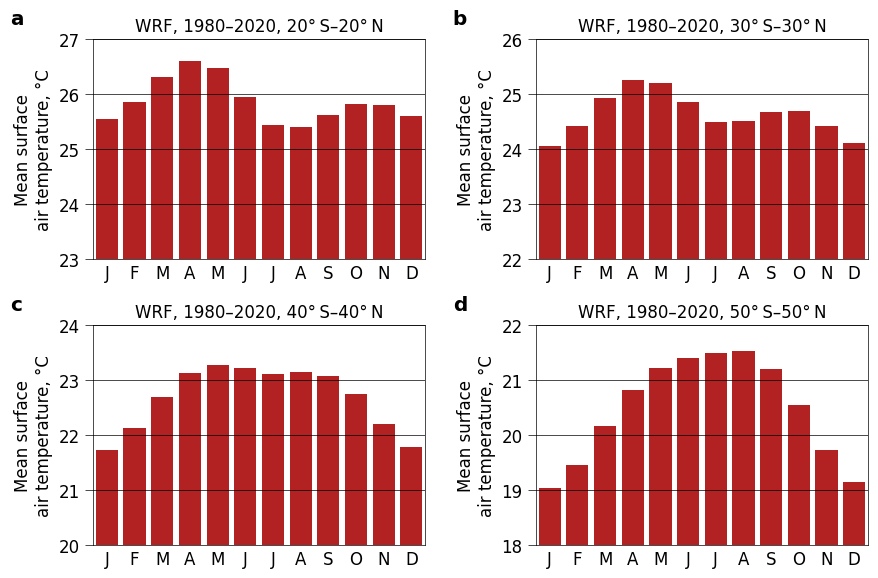

In [6]:
fig = plt.figure(figsize=(10, 14), constrained_layout=False)
ax = [None for _ in range(4)]
for n in range(4):
    ax[n] = fig.add_subplot(4, 4, (2 * n + 1, 2 * n + 2))

low = [23, 22, 20, 18]
high = [27, 26, 24, 22]
step = [1] * 4
coeff = [1] * 4
caption = [f"WRF, 1980–2020, {lt}° S–{lt}° N" for lt in lat]
# thin spaces (" ") are used between ‘°’ signs and letters
col = ["firebrick"] * 4

for n in range(4):
    for axis in ["top", "bottom", "left", "right"]:
        ax[n].spines[axis].set_linewidth(0.5)
    ax[n].tick_params(length=6, width=0.5, axis="y")
    ax[n].tick_params(length=0, width=0.5, axis="x")
    ax[n].grid(color="0.", linewidth=0.5, axis="y")

    ax[n].set_xlim((-0.5, 11.5))
    ax[n].set_xticks(np.arange(12))
    ax[n].set_xticklabels(month_name, fontsize="large", va="top")

    ax[n].set_ylim((low[n], high[n]))
    ax[n].set_yticks(np.arange(low[n], high[n] + step[n] / 2, step[n]))
    ax[n].set_yticklabels((np.arange(low[n], high[n] + step[n] / 2,
                                     step[n]) / coeff[n]).astype(int),
                          fontsize="large")
    ax[n].set_ylabel("Mean surface\nair temperature, °C",
                     fontsize="large")

    ax[n].set_title(caption[n], fontsize="large")

fig.align_ylabels([ax[0], ax[2]])
fig.align_ylabels([ax[1], ax[3]])

for n in range(4):
    # averaging temperature values taking into account
    # variable areas of 1° wide latitude strips
    T_values = np.average(wrf_mon_T2[90 - lat[n] : 90 + lat[n]],
                          axis=0,
                          weights=area_factor[90 - lat[n] : 90 + lat[n]])

    ax[n].bar(np.arange(12), T_values, width=0.8, color=col[n])

for n in range(4):
    ax[n].text(-0.25, 1.05, chr(ord("a") + n),
        fontsize="x-large",
        fontweight="semibold", ha="left", va="bottom",
        transform=ax[n].transAxes)

fig.subplots_adjust(hspace=0.3, wspace=1.0)

fig.savefig("figures/t2.eps", bbox_inches="tight")

### Figure 2.S1
Histograms of hourly CAPE values

In [7]:
# loading the processed data for histograms

wrf_cape_hist = np.load(
    "./data/WRF/WRF_CAPE_HIST.npz"
)
inm_scape_hist = np.load(
    "./data/INMCM/INMCM_SCAPE_HIST.npz"
)
wrf_cape_rain_hist = np.load(
    "./data/WRF/WRF_CAPE_RAIN_HIST.npz"
)
inm_scape_rain_hist = np.load(
    "./data/INMCM/INMCM_SCAPE_RAIN_HIST.npz"
)

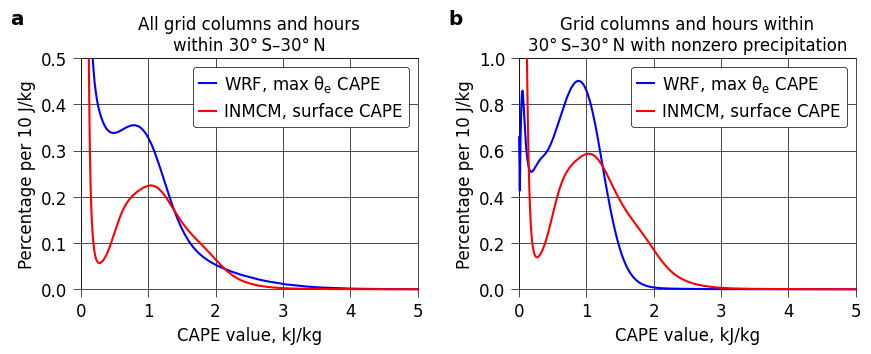

In [8]:
fig = plt.figure(figsize=(10, 3), constrained_layout=False)

ax = [None for _ in range(2)]
for n in range(2):
    ax[n] = fig.add_subplot(1, 2, n + 1)

low = [0, 0]
high = [5e-3, 10e-3]
step = [1e-3, 2e-3]
coeff = [1e-2, 1e-2]
caption = ["All grid columns and hours\nwithin 30° S–30° N",
           "Grid columns and hours within\n30° S–30° N with nonzero precipitation"]
# thin spaces (" ") are used in labels

for n in range(2):
    for axis in ["top", "bottom", "left", "right"]:
        ax[n].spines[axis].set_linewidth(0.5)
    ax[n].tick_params(length=6, width=0.5)
    ax[n].grid(color="0.", linewidth=0.5)

    ax[n].set_xlim((0, 5000))
    ax[n].set_xticks(np.arange(0, 5001, 1000))
    ax[n].set_xticklabels([f"{y:d}" for y in np.arange(6)],
                          fontsize="large")
    ax[n].set_xlabel("CAPE value, kJ/kg",
                     fontsize = "large")

    ax[n].set_ylim((low[n], high[n]))
    ax[n].set_yticks(np.arange(low[n], high[n] + step[n] / 2, step[n]))
    ax[n].set_yticklabels([f"{x:.1f}" for x in (np.arange(low[n],
                                                          high[n] + step[n] / 2,
                                                          step[n]) / coeff[n])],
                          fontsize="large")
    ax[n].set_ylabel("Percentage per 10 J/kg",
                     fontsize="large")

    ax[n].set_title(caption[n],
                    fontsize="large")

for data, col, lab in zip(
    [wrf_cape_hist, inm_scape_hist],
    ["blue", "red"],
    ["WRF, max θ$_\mathregular{e}$ CAPE", "INMCM, surface CAPE"]
):
    p, = ax[0].plot(
        (data["bins"][:-1] + data["bins"][1:]) / 2,
        data["values"] / np.sum(data["values"]),
        linewidth=1.5, color=col,
        zorder=6, label=lab
    )
    p.set_clip_box(
        transforms.TransformedBbox(
            transforms.Bbox.from_extents(-500, -0.001, 5000, high[0]),
            ax[0].transData
        )
    )

leg = ax[0].legend(loc="upper right", borderaxespad=0.5,
                   fontsize="large",
                   framealpha=1, edgecolor="0.",
                   handlelength=1., handletextpad=0.5)
leg.get_frame().set_linewidth(0.5)

for data, col, lab in zip(
    [wrf_cape_rain_hist, inm_scape_rain_hist],
    ["blue", "red"],
    ["WRF, max θ$_\mathregular{e}$ CAPE", "INMCM, surface CAPE"]
):
    p, = ax[1].plot(
        (data["bins"][:-1] + data["bins"][1:]) / 2,
        data["values"] / np.sum(data["values"]),
        linewidth=1.5, color=col,
        zorder=6, label=lab
    )
    p.set_clip_box(
        transforms.TransformedBbox(
            transforms.Bbox.from_extents(-500, -0.001, 5000, high[1]),
            ax[1].transData
        )
    )

leg = ax[1].legend(loc="upper right", borderaxespad=0.5,
                   fontsize="large",
                   framealpha=1, edgecolor="0.",
                   handlelength=1., handletextpad=0.5)
leg.get_frame().set_linewidth(0.5)

for n in range(2):
    ax[n].text(-0.21, 1.13, chr(ord("a") + n),
               fontsize="x-large",
               fontweight="semibold", ha="left", va="bottom",
               transform=ax[n].transAxes)

fig.subplots_adjust(wspace=0.3)

fig.savefig("figures/cape.eps", bbox_inches="tight")

In [9]:
# minima and maxima (in J/kg)
for data in [wrf_cape_hist, inm_scape_hist,
             wrf_cape_rain_hist, inm_scape_rain_hist]:
    print(
        100 + data["bins"][np.argmin(data["values"][10:80])],
        data["bins"][50 + np.argmax(data["values"][50:])]
    )

480 800
270 1030
180 880
260 1030
